In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.shape

(3593, 19)

In [ ]:
df=pd.read_csv('/content/gurgaon_properties_missing_value_imputation.csv')

In [ ]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,age_encoded
0,0,40,0.82,3.0,2.0,2.0,2.0,New Property,852.0,0.0,0.0,0.0,0.0,0.0,1,8.0,0.0
1,0,101,0.95,2.0,2.0,2.0,4.0,New Property,1241.0,1.0,1.0,0.0,0.0,0.0,1,38.0,0.0
2,0,111,0.32,2.0,2.0,1.0,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,1,49.0,0.0
3,0,105,1.60,3.0,4.0,3.0,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,2,174.0,1.0
4,0,4,0.48,2.0,2.0,1.0,5.0,Relatively New,583.0,0.0,0.0,1.0,0.0,0.0,1,159.0,1.0


In [ ]:
train_df['property_type'].value_counts()

,count
property_type,
0,2804
1,789


**luxury score**

<Axes: ylabel='luxury_score'>

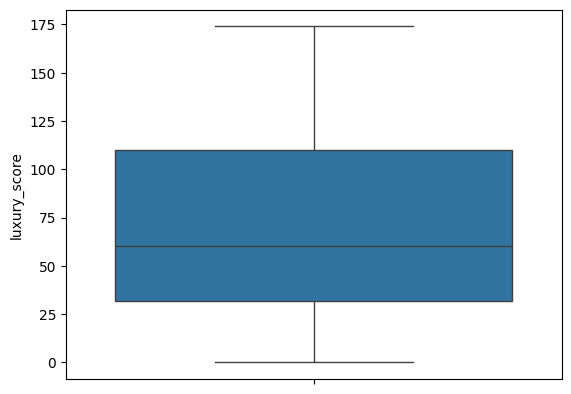

In [ ]:
sns.boxplot(df['luxury_score'])

In [ ]:
def categorize_luxury(score):
    if 0<=score<=50:
       return "Low"
    elif 50<score<=150:
        return "Medium"
    elif 150<score<=175:
        return "High"
    else:
        return None

In [ ]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3593 non-null   int64  
 1   sector           3593 non-null   int64  
 2   price            3593 non-null   float64
 3   bedRoom          3593 non-null   float64
 4   bathroom         3593 non-null   float64
 5   balcony          3593 non-null   float64
 6   floorNum         3593 non-null   float64
 7   agePossession    3593 non-null   object 
 8   built_up_area    3593 non-null   float64
 9   study room       3593 non-null   float64
 10  servant room     3593 non-null   float64
 11  store room       3593 non-null   float64
 12  pooja room       3593 non-null   float64
 13  others           3593 non-null   float64
 14  furnishing_type  3593 non-null   int64  
 15  luxury_score     3593 non-null   float64
 16  age_encoded      3299 non-null   float64
 17  luxury_categor

In [ ]:
train_df.drop(columns=['age_encoded'],inplace=True)

###floor number

<Axes: ylabel='floorNum'>

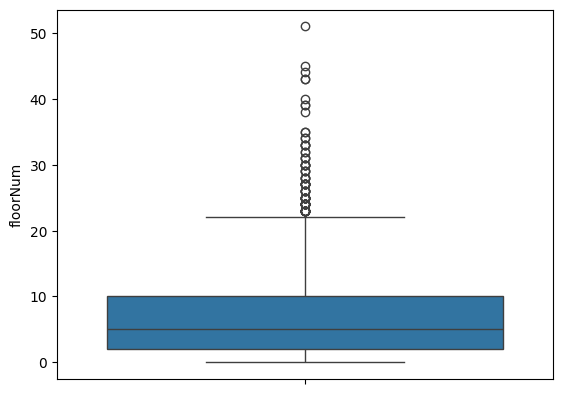

In [ ]:
sns.boxplot(df['floorNum'])


Pearson correlation between floorNum and price: -0.0868


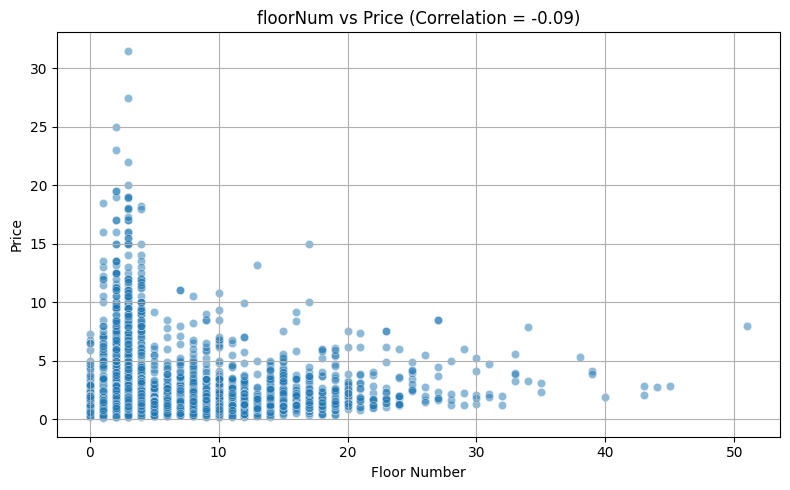

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute Pearson correlation
correlation = train_df['floorNum'].corr(train_df['price'])
print(f"Pearson correlation between floorNum and price: {correlation:.4f}")

# Step 2: Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='floorNum', y='price', alpha=0.5)
plt.title(f'floorNum vs Price (Correlation = {correlation:.2f})')
plt.xlabel('Floor Number')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,0,40,0.82,3.0,2.0,2.0,2.0,New Property,852.0,0.0,0.0,0.0,0.0,0.0,1,8.0,Low
1,0,101,0.95,2.0,2.0,2.0,4.0,New Property,1241.0,1.0,1.0,0.0,0.0,0.0,1,38.0,Low
2,0,111,0.32,2.0,2.0,1.0,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,1,49.0,Low
3,0,105,1.60,3.0,4.0,3.0,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,2,174.0,High
4,0,4,0.48,2.0,2.0,1.0,5.0,Relatively New,583.0,0.0,0.0,1.0,0.0,0.0,1,159.0,High


In [ ]:
train_df['total_rooms'] = (
    train_df['bedRoom'] +
    train_df['bathroom'] +
    train_df['balcony'] +
    train_df['study room'] +
    train_df['servant room'] +
    train_df['store room'] +
    train_df['pooja room'] +
    train_df['others']
)


In [ ]:
train_df['total_rooms'].value_counts()

,count
total_rooms,
10.0,462
11.0,432
9.0,403
8.0,371
7.0,346
6.0,343
12.0,273
13.0,217
5.0,148


Pearson correlation between total_rooms and price: 0.6414


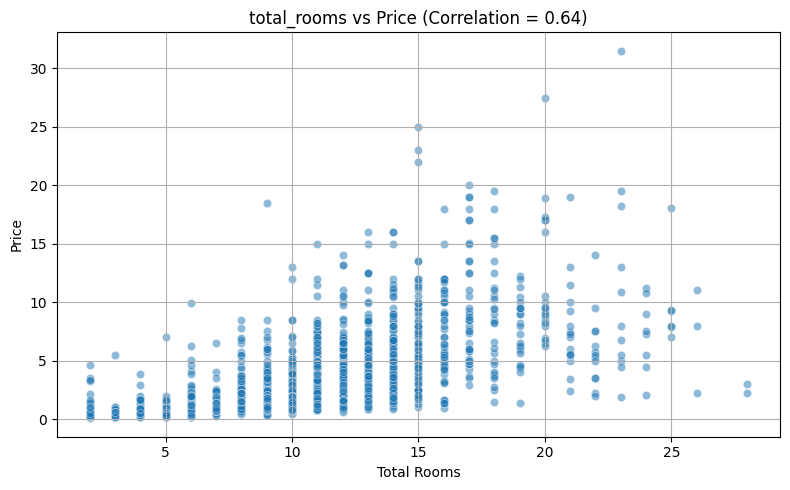

In [ ]:


# Step 1: Compute Pearson correlation
correlation = train_df['total_rooms'].corr(train_df['price'])
print(f"Pearson correlation between total_rooms and price: {correlation:.4f}")

# Step 2: Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='total_rooms', y='price', alpha=0.5)
plt.title(f'total_rooms vs Price (Correlation = {correlation:.2f})')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


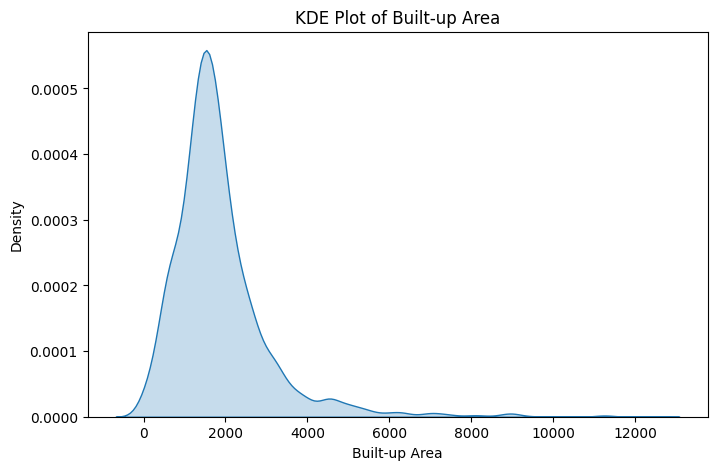

Skewness of built-up area: 2.6731131682138685


In [ ]:

# KDE plot
plt.figure(figsize=(8,5))
sns.kdeplot(train_df['built_up_area'], shade=True)
plt.title('KDE Plot of Built-up Area')
plt.xlabel('Built-up Area')
plt.ylabel('Density')
plt.show()

# Skewness
skewness = train_df['built_up_area'].skew()
print(f"Skewness of built-up area: {skewness}")


In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,total_rooms
0,0,40,0.82,3.0,2.0,2.0,2.0,New Property,852.0,0.0,0.0,0.0,0.0,0.0,1,8.0,Low,7.0
1,0,101,0.95,2.0,2.0,2.0,4.0,New Property,1241.0,1.0,1.0,0.0,0.0,0.0,1,38.0,Low,8.0
2,0,111,0.32,2.0,2.0,1.0,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,1,49.0,Low,5.0
3,0,105,1.60,3.0,4.0,3.0,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,2,174.0,High,12.0
4,0,4,0.48,2.0,2.0,1.0,5.0,Relatively New,583.0,0.0,0.0,1.0,0.0,0.0,1,159.0,High,6.0


In [ ]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins




train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)





In [ ]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,total_rooms,floor_category
0,0,40,0.82,3.0,2.0,2.0,New Property,852.0,0.0,0.0,0.0,0.0,0.0,1,Low,7.0,Low Floor
1,0,101,0.95,2.0,2.0,2.0,New Property,1241.0,1.0,1.0,0.0,0.0,0.0,1,Low,8.0,Mid Floor
2,0,111,0.32,2.0,2.0,1.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,1,Low,5.0,High Floor
3,0,105,1.60,3.0,4.0,3.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,2,High,12.0,Mid Floor
4,0,4,0.48,2.0,2.0,1.0,Relatively New,583.0,0.0,0.0,1.0,0.0,0.0,1,High,6.0,Mid Floor


**encoding of categorical columns**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3593 non-null   int64  
 1   sector           3593 non-null   int64  
 2   price            3593 non-null   float64
 3   bedRoom          3593 non-null   float64
 4   bathroom         3593 non-null   float64
 5   balcony          3593 non-null   float64
 6   agePossession    3593 non-null   object 
 7   built_up_area    3593 non-null   float64
 8   study room       3593 non-null   float64
 9   servant room     3593 non-null   float64
 10  store room       3593 non-null   float64
 11  pooja room       3593 non-null   float64
 12  others           3593 non-null   float64
 13  furnishing_type  3593 non-null   int64  
 14  luxury_category  3593 non-null   object 
 15  total_rooms      3593 non-null   float64
 16  floor_category   3593 non-null   object 
dtypes: float64(11)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']


[array(['Moderately Old', 'New Property', 'Old Property', 'Relatively New',
       'Under Construction'], dtype=object)]
[array(['High', 'Low', 'Medium'], dtype=object)]
[array(['High Floor', 'Low Floor', 'Mid Floor'], dtype=object)]


In [ ]:

X_label


,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,total_rooms,floor_category
0,0,40,3.0,2.0,2.0,1.0,852.0,0.0,0.0,0.0,0.0,0.0,1,1.0,7.0,1.0
1,0,101,2.0,2.0,2.0,1.0,1241.0,1.0,1.0,0.0,0.0,0.0,1,1.0,8.0,2.0
2,0,111,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,1,1.0,5.0,0.0
3,0,105,3.0,4.0,3.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,2,0.0,12.0,2.0
4,0,4,2.0,2.0,1.0,3.0,583.0,0.0,0.0,1.0,0.0,0.0,1,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,0,96,2.0,2.0,1.0,3.0,534.0,0.0,0.0,0.0,0.0,0.0,1,2.0,5.0,2.0
3589,1,11,5.0,5.0,3.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,1,0.0,17.0,1.0
3590,0,25,1.0,1.0,1.0,0.0,661.0,0.0,0.0,0.0,0.0,0.0,2,2.0,3.0,2.0
3591,1,50,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,1,2.0,18.0,2.0


In [ ]:

y_label


,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3588,0.37
3589,6.00
3590,0.60
3591,15.50


In [ ]:
y_label

,price
0,0.82
1,0.95
2,0.32
3,1.60
4,0.48
...,...
3588,0.37
3589,6.00
3590,0.60
3591,15.50


##Technique 1 - Correlation Analysis

<Axes: >

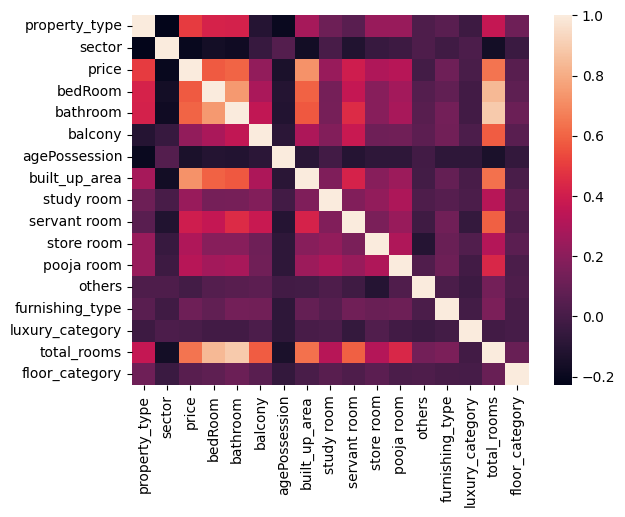

In [ ]:
sns.heatmap(data_label_encoded.corr())

In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201869
1,price,1.000000
2,bedRoom,0.573356
3,bathroom,0.601394
4,balcony,0.222860
5,agePossession,-0.140319
6,built_up_area,0.722529
7,study room,0.241938
8,servant room,0.396654
9,store room,0.304283


##Technique 2 - Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.604286
1,sector,0.102090
0,property_type,0.092560
14,total_rooms,0.083643
3,bathroom,0.019425
2,bedRoom,0.018340
5,agePossession,0.015782
8,servant room,0.012845
12,furnishing_type,0.010489
13,luxury_category,0.008268


##Technique 3 - Gradient Boosting Feature importances

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3


,feature,gb_importance
6,built_up_area,0.621891
14,total_rooms,0.112335
1,sector,0.101202
0,property_type,0.099336
8,servant room,0.020184
2,bedRoom,0.016291
3,bathroom,0.010227
7,study room,0.008192
12,furnishing_type,0.003518
9,store room,0.003441


##Technique 4 - Permutation Importance

In [ ]:

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4


,feature,permutation_importance
6,built_up_area,0.576340
0,property_type,0.159305
14,total_rooms,0.148107
1,sector,0.136065
2,bedRoom,0.006469
8,servant room,0.006303
3,bathroom,0.005470
7,study room,0.004774
5,agePossession,0.002806
9,store room,0.002752


##Technique 5 - LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.408030
0,property_type,0.727713
3,bathroom,0.370292
9,store room,0.218590
8,servant room,0.204811
7,study room,0.179977
10,pooja room,0.092270
12,furnishing_type,0.047261
13,luxury_category,0.046451
14,total_rooms,0.000000


##Technique 6 - RFE

In [ ]:

from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.607464
1,sector,0.099433
0,property_type,0.091861
14,total_rooms,0.080163
3,bathroom,0.019490
2,bedRoom,0.018457
5,agePossession,0.016023
8,servant room,0.014402
12,furnishing_type,0.010191
7,study room,0.009026


##Technique 7 - Linear Regression Weights

In [ ]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.410229
0,property_type,0.728869
3,bathroom,0.306650
9,store room,0.209658
8,servant room,0.190061
7,study room,0.170986
14,total_rooms,0.163439
10,pooja room,0.078306
13,luxury_category,0.056312
12,furnishing_type,0.055422


##Technique 8 - SHAP

In [ ]:

!pip install shap

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-1.65754299e-01,  1.08589826e-01, -1.19165707e-02, ...,
        -9.24410413e-03, -2.26779752e-01, -9.78563462e-03],
       [-1.91311451e-01, -4.67718929e-01, -3.99716870e-02, ...,
        -6.93405592e-03, -1.42588173e-01, -7.63850059e-03],
       [-1.85978986e-01, -4.25492512e-01, -1.83727601e-02, ...,
        -1.11653928e-02, -3.04134649e-01, -1.20998735e-02],
       ...,
       [-1.72493966e-01,  6.89068886e-02, -2.06857024e-04, ...,
         2.44550223e-02, -2.49896368e-01, -6.43481744e-03],
       [ 1.30303371e+00,  7.91380981e-01,  3.10786332e-01, ...,
         1.77989692e-01,  1.91525462e+00,  3.43874255e-02],
       [-2.92456906e-01, -2.90172198e-02, -3.19448849e-03, ...,
        -8.08595510e-03, -8.94432290e-02,  4.67322207e-02]])

In [ ]:

fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.133560
0,property_type,0.440027
1,sector,0.386651
14,total_rooms,0.259630
8,servant room,0.066997
3,bathroom,0.056762
2,bedRoom,0.033155
5,agePossession,0.029818
12,furnishing_type,0.027761
15,floor_category,0.025079


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Fit SelectKBest using F-test for regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_label, y_label)

# Create DataFrame sorted by F-score (high score = more important)
fi_df9 = pd.DataFrame({
    'feature': X_label.columns,
    'F_score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values(by='F_score', ascending=False)

fi_df9


,feature,F_score,p_value
6,built_up_area,3922.311668,0.000000e+00
14,total_rooms,2509.215043,0.000000e+00
3,bathroom,2034.656790,0.000000e+00
2,bedRoom,1758.621774,3.554714e-313
0,property_type,1199.006780,5.894406e-227
8,servant room,670.478123,1.094088e-135
10,pooja room,421.716052,1.066714e-88
9,store room,366.410263,7.542593e-78
7,study room,223.264491,5.067976e-49
4,balcony,187.672978,1.123364e-41


In [ ]:
X_label.shape

(3593, 16)

In [ ]:
# prompt: fi_df9  normalize it

from sklearn.preprocessing import MinMaxScaler

# Assuming fi_df9 is already defined as in your provided code

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the numerical columns to normalize
numerical_cols = ['F_score', 'p_value']

# Fit and transform the selected columns
fi_df9[numerical_cols] = scaler.fit_transform(fi_df9[numerical_cols])

# Now fi_df9 contains the normalized F_score and p_value columns
fi_df9


,feature,F_score,p_value
6,built_up_area,1.000000,0.000000e+00
14,total_rooms,0.639689,0.000000e+00
3,bathroom,0.518687,0.000000e+00
2,bedRoom,0.448304,6.919307e-313
0,property_type,0.305613,1.147356e-226
8,servant room,0.170849,2.129659e-135
10,pooja room,0.107420,2.076377e-88
9,store room,0.093318,1.468178e-77
7,study room,0.056819,9.864897e-49
4,balcony,0.047744,2.186647e-41


In [ ]:
# prompt: Using dataframe fi_df9: remove column p_value

# Remove the 'p_value' column from the DataFrame.
fi_df9 = fi_df9.drop('p_value', axis=1)


In [ ]:
# prompt: final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
#    in this code add fi_df9 also

final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').merge(fi_df9, on='feature').set_index('feature')


In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score,F_score
feature,,,,,,,,,
sector,-0.201869,0.102090,0.101202,0.136065,-0.049755,0.099433,-0.057750,0.386651,0.038790
bedRoom,0.573356,0.018340,0.016291,0.006469,0.000000,0.018457,-0.058068,0.033155,0.448304
bathroom,0.601394,0.019425,0.010227,0.005470,0.370292,0.019490,0.306650,0.056762,0.518687
balcony,0.222860,0.005718,0.000475,0.001005,-0.000000,0.005672,-0.050153,0.016586,0.047744
agePossession,-0.140319,0.015782,0.001315,0.002806,-0.014976,0.016023,-0.022845,0.029818,0.018282
built_up_area,0.722529,0.604286,0.621891,0.576340,1.408030,0.607464,1.410229,1.133560,1.000000
study room,0.241938,0.008234,0.008192,0.004774,0.179977,0.009026,0.170986,0.013530,0.056819
servant room,0.396654,0.012845,0.020184,0.006303,0.204811,0.014402,0.190061,0.066997,0.170849
store room,0.304283,0.005111,0.003441,0.002752,0.218590,0.005032,0.209658,0.009057,0.093318


In [ ]:

# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score,F_score
feature,,,,,,,,,
sector,-0.052268,0.112504,0.112364,0.152586,-0.020176,0.109491,-0.024250,0.184591,0.012290
bedRoom,0.148453,0.020211,0.018088,0.007254,0.000000,0.020324,-0.024384,0.015829,0.142040
bathroom,0.155712,0.021406,0.011355,0.006135,0.150158,0.021461,0.128769,0.027099,0.164340
balcony,0.057703,0.006301,0.000527,0.001127,-0.000000,0.006246,-0.021060,0.007918,0.015127
agePossession,-0.036331,0.017392,0.001461,0.003147,-0.006073,0.017644,-0.009593,0.014235,0.005792
built_up_area,0.187076,0.665925,0.690480,0.646315,0.570974,0.668910,0.592186,0.541173,0.316838
study room,0.062642,0.009074,0.009096,0.005353,0.072983,0.009939,0.071801,0.006460,0.018002
servant room,0.102701,0.014155,0.022410,0.007068,0.083053,0.015859,0.079811,0.031985,0.054132
store room,0.078785,0.005632,0.003820,0.003086,0.088641,0.005541,0.088040,0.004324,0.029567


In [ ]:
final_fi_df.mean(axis=1).sort_values(ascending=False)


,0
feature,
built_up_area,0.542209
total_rooms,0.114731
bathroom,0.076271
sector,0.065237
servant room,0.045686
bedRoom,0.038646
store room,0.034160
study room,0.029483
pooja room,0.022302


In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score','F_score']].mean(axis=1).sort_values(ascending=False)


,0
feature,
built_up_area,0.588273
total_rooms,0.132981
sector,0.113971
bathroom,0.041966
bedRoom,0.037291
servant room,0.024268
agePossession,0.009945
study room,0.009654
store room,0.008662


In [ ]:


final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.642561
sector,0.134307
total_rooms,0.119042
servant room,0.018296
bathroom,0.017491
bedRoom,0.016341
agePossession,0.010776
study room,0.007984
furnishing_type,0.007891


In [ ]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,total_rooms,floor_category
0,0,40,3.0,2.0,2.0,1.0,852.0,0.0,0.0,0.0,0.0,0.0,1,1.0,7.0,1.0
1,0,101,2.0,2.0,2.0,1.0,1241.0,1.0,1.0,0.0,0.0,0.0,1,1.0,8.0,2.0
2,0,111,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,1,1.0,5.0,0.0
3,0,105,3.0,4.0,3.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,2,0.0,12.0,2.0
4,0,4,2.0,2.0,1.0,3.0,583.0,0.0,0.0,1.0,0.0,0.0,1,0.0,6.0,2.0


In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')




scores.mean()


np.float64(0.7862257037983472)

In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=[ 'others']), y_label, cv=5, scoring='r2')




scores.mean()

np.float64(0.7909387215051653)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 500],
     'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_label.drop(columns=[ 'others']), y_label)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score (Negative MSE): ", grid_search.best_score_)

# Use the best model
best_rf = grid_search.best_estimator_


Best parameters found:  {'bootstrap': True, 'max_features': None, 'n_estimators': 500}
Best score (Negative MSE):  -1.6611916088441636


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model with the best parameters found
rf_best = RandomForestRegressor(
    bootstrap=True,
    max_features=None,
    n_estimators=500,
    random_state=42
)

# Perform cross-validation with R² score
cv_scores = cross_val_score(rf_best, X_label, y_label, cv=5, scoring='r2')

# Calculate the mean score and standard deviation of R²
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Print the results
print(f"Cross-validated R² score: {mean_score:.4f}")
print(f"Standard Deviation of R² score: {std_dev:.4f}")


Cross-validated R² score: 0.7910
Standard Deviation of R² score: 0.0253


In [ ]:
export_df = X_label.drop(columns=['others'])
export_df['price'] = y_label

In [ ]:

export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)



In [ ]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,furnishing_type,luxury_category,total_rooms,floor_category,price
0,0,40,3.0,2.0,2.0,1.0,852.0,0.0,0.0,0.0,0.0,1,1.0,7.0,1.0,0.82
1,0,101,2.0,2.0,2.0,1.0,1241.0,1.0,1.0,0.0,0.0,1,1.0,8.0,2.0,0.95
2,0,111,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,1,1.0,5.0,0.0,0.32
3,0,105,3.0,4.0,3.0,3.0,1615.0,0.0,1.0,0.0,0.0,2,0.0,12.0,2.0,1.60
4,0,4,2.0,2.0,1.0,3.0,583.0,0.0,0.0,1.0,0.0,1,0.0,6.0,2.0,0.48


In [ ]:


from google.colab import files
files.download('gurgaon_properties_post_feature_selection.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Baseline Model

In [ ]:
import numpy as np
import pandas as pd




df = pd.read_csv('gurgaon_properties_post_feature_selection.csv')




df.head()




,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,furnishing_type,luxury_category,total_rooms,floor_category,price
0,0,40,3.0,2.0,2.0,1.0,852.0,0.0,0.0,0.0,0.0,1,1.0,7.0,1.0,0.82
1,0,101,2.0,2.0,2.0,1.0,1241.0,1.0,1.0,0.0,0.0,1,1.0,8.0,2.0,0.95
2,0,111,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,1,1.0,5.0,0.0,0.32
3,0,105,3.0,4.0,3.0,3.0,1615.0,0.0,1.0,0.0,0.0,2,0.0,12.0,2.0,1.60
4,0,4,2.0,2.0,1.0,3.0,583.0,0.0,0.0,1.0,0.0,1,0.0,6.0,2.0,0.48


In [ ]:
# one hot encode -> sector, balcony, agePossession, furnishing type, luxury category, floor category



In [ ]:
X = df.drop(columns=['price'])
y = df['price']


In [ ]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR




In [ ]:

columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']



In [ ]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)


In [ ]:
print(X[columns_to_encode].dtypes)

sector               int64
balcony            float64
agePossession      float64
furnishing_type      int64
luxury_category    float64
floor_category     float64
dtype: object


In [ ]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

# Convert columns to 'object' if they are numerical
for col in columns_to_encode:
    if X[col].dtype in ['int64', 'float64']:
        X[col] = X[col].astype('object')

# Display the data types to verify
print(X[columns_to_encode].dtypes)


sector             object
balcony            object
agePossession      object
furnishing_type    object
luxury_category    object
floor_category     object
dtype: object


In [ ]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)



In [ ]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])


In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')







In [ ]:
scores.mean()

np.float64(nan)

In [ ]:
scores.std()

np.float64(nan)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)


In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [ ]:

y_pred = pipeline.predict(X_test)




y_pred = np.expm1(y_pred)




from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.6669815449460593

In [ ]:
d=pd.read_csv('/content/gurgaon_properties_post_feature_selection (1).csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   int64  
 1   sector           3554 non-null   int64  
 2   bedRoom          3554 non-null   float64
 3   bathroom         3554 non-null   float64
 4   balcony          3554 non-null   int64  
 5   agePossession    3554 non-null   int64  
 6   built_up_area    3554 non-null   float64
 7   servant room     3554 non-null   float64
 8   store room       3554 non-null   float64
 9   furnishing_type  3554 non-null   float64
 10  luxury_category  3554 non-null   int64  
 11  floor_category   3554 non-null   int64  
 12  price            3554 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 361.1 KB


In [ ]:
X = d.drop(columns=['price'])
y = d['price']

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR


In [ ]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']




# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)




# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)




# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])


In [ ]:
# K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')




scores.mean()


np.float64(0.8845360715052788)

In [ ]:
scores.std()

np.float64(0.014784881452419891)

In [ ]:
d.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


In [ ]:


# Create the 'total_rooms' column by summing up the specified columns, excluding 'others'.
d['total_rooms'] = (d['bedRoom'] + d['bathroom'] + d['balcony'] + d['servant room'] + d['store room'])


In [ ]:
d.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price,total_rooms
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82,7.0
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95,7.0
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32,5.0
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60,12.0
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48,6.0


In [ ]:
X = d.drop(columns=['price'])
y = d['price']

In [ ]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']




# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)




# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room','total_rooms']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)




# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])




# K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')




scores.mean()


np.float64(0.8799525791397445)

In [ ]:
d.shape

(3554, 14)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)




pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room', 'store room',
                                                   'total_rooms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [ ]:

y_pred = pipeline.predict(X_test)




y_pred = np.expm1(y_pred)




from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.5328557731408757